# GRIP At The Sparks Foundation
### NAME : JYOT AJANI
### TASK 1 : Prediction using Supervised ML

In [41]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# importing data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.shape

Data imported successfully


(25, 2)

In [43]:
# print imported data
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
# statistical details of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


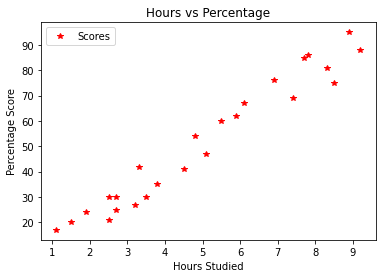

In [45]:
# Plotting the 2-D graph of data
data.plot(x='Hours', y='Scores', style='*', c='r')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [46]:
# Preparing the Data
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Now we have our attributes and labels and next step is to split this data into training and test sets. We'll do by using Scikit-Learn's built-in train_test_split() method:

In [47]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Training the Algorithm

 We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [49]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Complete training.")

Complete training.


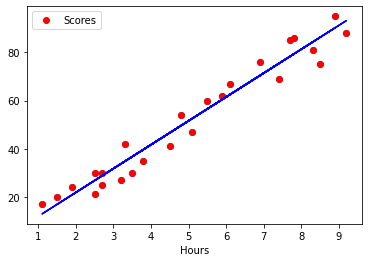

In [50]:
# Plotting regression line
line = regressor.coef_*X+regressor.intercept_
data.plot(x='Hours', y='Scores', style='o', c='r') 

# Plotting for test data
plt.scatter(X, y)
plt.plot(X, line, c='b');
plt.show()

### Making Predictions

It's time to make some predictions.

In [51]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [52]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluting the Model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


In [54]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
